In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [2]:
data = pd.read_excel('Online Retail.xlsx', index_col = 'InvoiceDate')

In [3]:
data.shape

(541909, 7)

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 541909 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   UnitPrice    541909 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [7]:
data.duplicated().sum()

5269

In [8]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
data = data.dropna()

In [10]:
data = data.drop(['Description'], axis =1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 406829 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   InvoiceNo   406829 non-null  object 
 1   StockCode   406829 non-null  object 
 2   Quantity    406829 non-null  int64  
 3   UnitPrice   406829 non-null  float64
 4   CustomerID  406829 non-null  float64
 5   Country     406829 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 21.7+ MB


In [12]:
data["Country"] = data["Country"].astype('category')
data["InvoiceNo"] = data["InvoiceNo"].astype('category')
data["StockCode"] = data["StockCode"].astype('category')
data.dtypes

InvoiceNo     category
StockCode     category
Quantity         int64
UnitPrice      float64
CustomerID     float64
Country       category
dtype: object

In [13]:
data["Country"] = data["Country"].cat.codes
data["InvoiceNo"] = data["InvoiceNo"].cat.codes
data["StockCode"] = data["StockCode"].cat.codes
data.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,
2010-12-01 08:26:00,0,3366,6,2.55,17850.0,35
2010-12-01 08:26:00,0,2431,6,3.39,17850.0,35
2010-12-01 08:26:00,0,3128,8,2.75,17850.0,35
2010-12-01 08:26:00,0,3098,6,3.39,17850.0,35
2010-12-01 08:26:00,0,3097,6,3.39,17850.0,35


In [48]:
pca = PCA(n_components=0.95, svd_solver='full')
pca.fit(data)
print(pca.explained_variance_ratio_)

[0.89248606 0.08499382]


In [49]:
pca_data = pca.transform(data)

In [50]:
WCSS =[]
for i in range(1, 9):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(pca_data)
    WCSS.append(KM.inertia_)

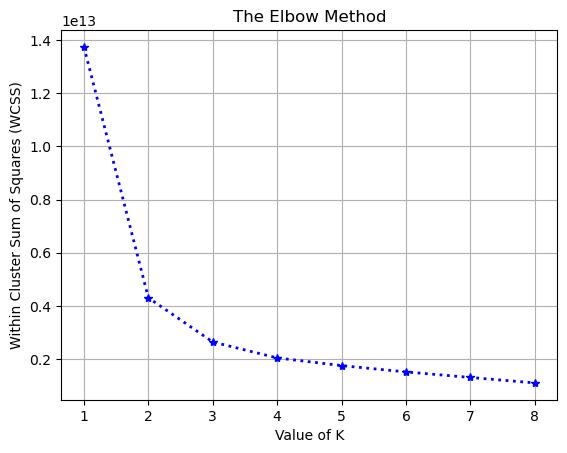

In [51]:
plt.plot(range(1, 9), WCSS,'*:b', linewidth ='2')
plt.title('The Elbow Method')
plt.xlabel("Value of K")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.grid()
plt.show()

### Optimum value for K is 3

In [52]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_data)
y_kmeans = kmeans.predict(pca_data)

In [53]:
pca_data.shape

(406829, 2)

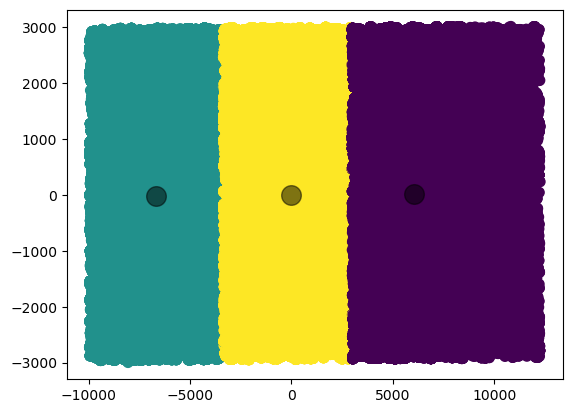

In [54]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [55]:
df_Kmeans = pd.concat([data.reset_index(drop=True), pd.DataFrame(pca_data)], axis=1)
df_Kmeans.columns.values[-2:] = ['Component 1','Component 2']
df_Kmeans['Segment KMeans PCA'] = kmeans.labels_

In [56]:
df_Kmeans.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Component 1,Component 2,Segment KMeans PCA
0,0,3366,6,2.55,17850.0,35,-9931.156397,2545.367523,1
1,0,2431,6,3.39,17850.0,35,-9943.322225,2544.015222,1
2,0,3128,8,2.75,17850.0,35,-9934.253977,2545.022219,1
3,0,3098,6,3.39,17850.0,35,-9934.643443,2544.979803,1
4,0,3097,6,3.39,17850.0,35,-9934.656454,2544.978357,1


In [57]:
df_Kmeans['Segment'] = df_Kmeans['Segment KMeans PCA'].map({0:'first',1:'second',2:'third'})

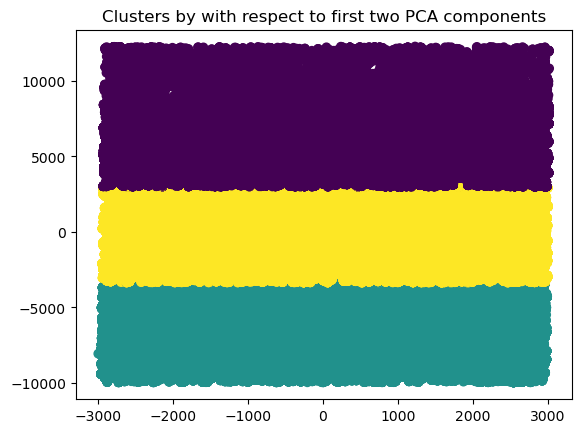

In [71]:
x_axis = df_Kmeans['Component 2']
y_axis = df_Kmeans['Component 1']
plt.scatter(x_axis,y_axis, c = df_Kmeans['Segment KMeans PCA'])
plt.title('Clusters by with respect to first two PCA components')
plt.show()